### **EDA: Info of most popular Videogames**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.gridspec as gridspec
import plotly.express as px

%matplotlib widget

In [2]:
videogames = pd.read_csv('vgsales.csv')

## Handling missing values

In [3]:
videogames.info() 
# Null values aparently just in Year and Publisher

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
videogames.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5,4027,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49
6,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
7,6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27
8,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
9,240,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.0,0.05,4.50


In [5]:
videogames.isna().sum() 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
videogames[videogames['Year'].isna()]
# Missing Year Values
# First option: Drop rows
# Second option: Extract year from name of the videogame
# Last option: WebScrapping

# Development of the second options
names_without_year = videogames[videogames['Year'].isna()]['Name']
names_without_year

16327                Madden NFL 2004
16328               FIFA Soccer 2004
16329     LEGO Batman: The Videogame
16330     wwe Smackdown vs. Raw 2006
16331                 Space Invaders
                    ...             
16593                  Freaky Flyers
16594                      Inversion
16595    Hakuouki: Shinsengumi Kitan
16596                   Virtua Quest
16597                     The Smurfs
Name: Name, Length: 271, dtype: object

In [7]:
# Development of the second options
pattern_years = r"\b(19[6-9][0-9]|20[0-2][0-9])\b"
years = []

for title in names_without_year:
    match = re.findall(pattern_years, title)
    year = match[0] if match else np.nan
    try:
        years.append(int(year))
    except:
        years.append(year)

print("Current missing values: ", years.count(np.nan) )
years[0:7]      

Current missing values:  254


[2004, 2004, nan, 2006, nan, nan, nan]

In [8]:
videogames.loc[videogames['Year'].isna(), 'Year'] = years
videogames.isna().sum() 

Rank              0
Name              0
Platform          0
Year            254
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
# Development of third option: Web Scrapping missing years (260 values)
names_without_year = videogames[videogames['Year'].isna()]['Name']
names_without_year


16329                     LEGO Batman: The Videogame
16331                                 Space Invaders
16332                                      Rock Band
16333       Frogger's Adventures: Temple of the Frog
16334    LEGO Indiana Jones: The Original Adventures
                            ...                     
16593                                  Freaky Flyers
16594                                      Inversion
16595                    Hakuouki: Shinsengumi Kitan
16596                                   Virtua Quest
16597                                     The Smurfs
Name: Name, Length: 254, dtype: object

## Web Scrapping Part

In [10]:
# Web Scraping developed from the website: https://www.mobygames.com/
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [14]:
chrome_options = Options()
chrome_options.add_argument("--headless=new") # hide GUI
chrome_options.add_argument("--window-size=1920,1080")  # set window size to native GUI size
my_user_agent = "Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36"
chrome_options.add_argument(f"--user-agent={my_user_agent}")# Set the custom User-Agent

# Ignore images for speed enhancement
chrome_prefs = {
    "profile.default_content_setting_values": {
        "images": 2,
    }
}

chrome_options.experimental_options["prefs"] = chrome_prefs

driver = webdriver.Chrome(options=chrome_options)
url = "https://www.mobygames.com/"
driver.get(url)

print("Connected to the website: ", driver.title)

Connected to the website:  Video Game Database - MobyGames


In [15]:
# Simulate navigating and searching a game
missing_years = []

for game_title in names_without_year:
    search_bar = driver.find_element(By.CSS_SELECTOR, "input[type='search']") #'q' is the name of the search bar in this site
    search_bar.clear()
    search_bar.send_keys(game_title)
    search_bar.send_keys(Keys.RETURN)

    #print("Searching in URL: ", driver.current_url)
    texts = driver.find_elements("css selector", "tr .text-muted")
    try:
        missing_years.append(texts[1].text)
    except:
        try:
            missing_years.append(texts[2].text)
        except:
            missing_years.append(np.nan)
print('WebScraping finished')
driver.quit()

WebScraping finished


In [16]:
missing_years #Preview of years obtained (need to clean and retain only the years if they exist)}
missing_years = ["missing value" if isinstance(x, float) and np.isnan(x) else x for x in missing_years]

In [17]:
# The same previous regex is used
years = []

for title in missing_years:
    match = re.findall(pattern_years, title)
    year = match[0] if match else np.nan
    try:
        years.append(int(year))
    except:
        years.append(year)

print("Current missing values: ", years.count(np.nan) )
years[0:7]      

Current missing values:  5


[2008, 1978, 2007, 2001, 2008, 2006, 2007]

In [18]:
videogames.loc[videogames['Year'].isna(), 'Year'] = years
videogames.isna().sum() 

Rank             0
Name             0
Platform         0
Year             5
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [19]:
# Now we have just 5 missing values in the data. Them could be removed or filled with a simple manual search
# In the same website we looked for them manually, and fill the proper years
final_missing_years = [2006, 2004, 2005, 2008, 2009]
videogames.loc[videogames['Year'].isna(), 'Year'] = final_missing_years
videogames.isna().sum() 
# As publisher is not as important as year or platflorm or total sales, we decided to just remove the publisher nan for the analysis

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

## Exploratory Data Analysis

In [20]:
videogames.describe() # An idea of how is the data distributed

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.381552,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.891227,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1976.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2023.000000,41.490000,29.020000,10.220000,10.570000,82.740000


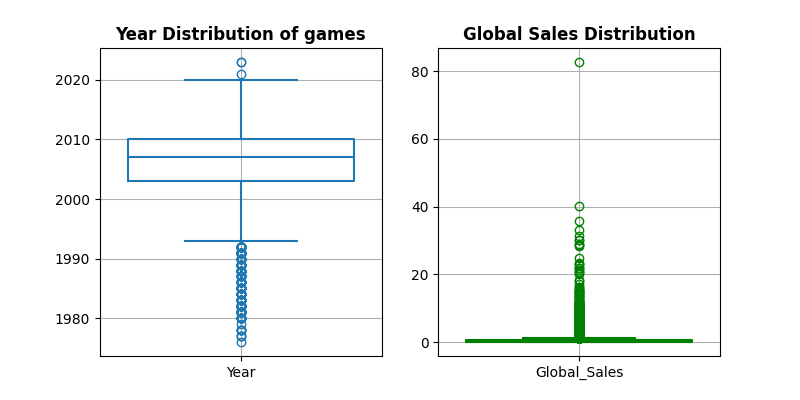

In [21]:
# Outliers in Data
fig  = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(data=videogames[['Year']], fill = False)
ax1.set_title('Year Distribution of games', weight = 'bold')
ax1.grid() #The vast majority of games in the database are between 2003 and 2010

ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=videogames[['Global_Sales']],fill = False, color = 'green')
ax2.set_title('Global Sales Distribution', weight = 'bold')
#ax2.set_ylim([0, 2])
ax2.grid()
# In the database, if the videogame sold above 1 million copies worldwide, that was atypical
# The vast majority of the games sold between 50 000 and 500 000 copies worldwide

In [22]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


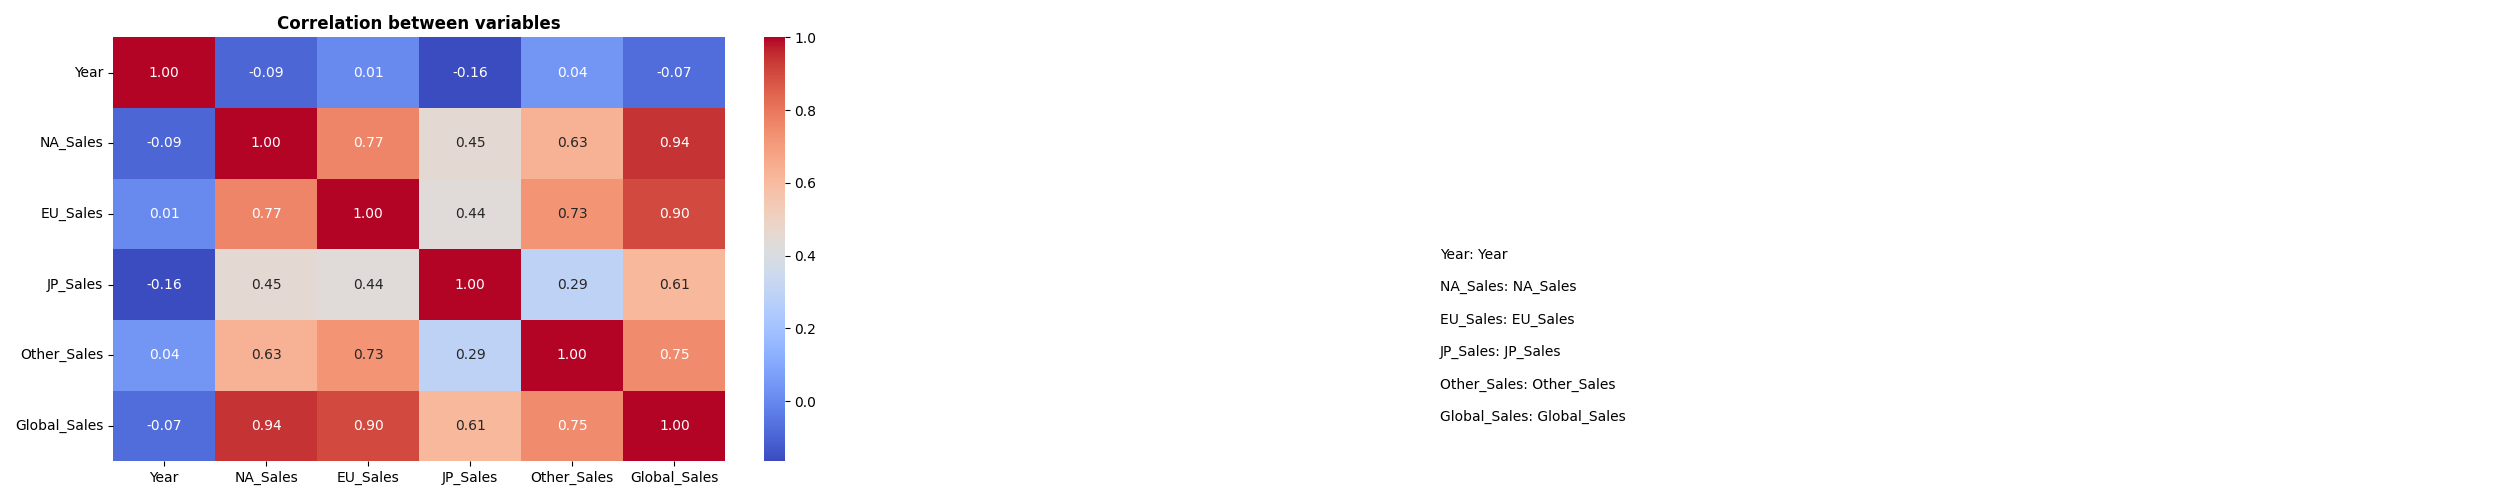

In [23]:
CORR_MATRIX = videogames[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

plt.figure(figsize = (25,5))
sns.heatmap(CORR_MATRIX, cmap = 'coolwarm', fmt= '.2f', annot = True)
plt.title("Correlation between variables", fontweight = 'bold', fontsize = 12)
plt.text(13, 4, """
                \nYear: Year
                \nNA_Sales: NA_Sales
                \nEU_Sales: EU_Sales
                \nJP_Sales: JP_Sales
                \nOther_Sales: Other_Sales
                \nGlobal_Sales: Global_Sales""", 
                fontsize=10, color='black', ha='left', va='center')
plt.tight_layout()
plt.show()

# Of course the most related variables are the sales. The year practically is not important when a game hits.
# On the other hand, North America Sales are more correlated with global sales (most population than just USA)
# and japan sales are moderately related to the sales in USA and North America (by means of least population or least interest in videogames)

In [24]:
videogames['Year'] = pd.to_datetime(videogames['Year'].astype(int).astype(str) + '-01-01')

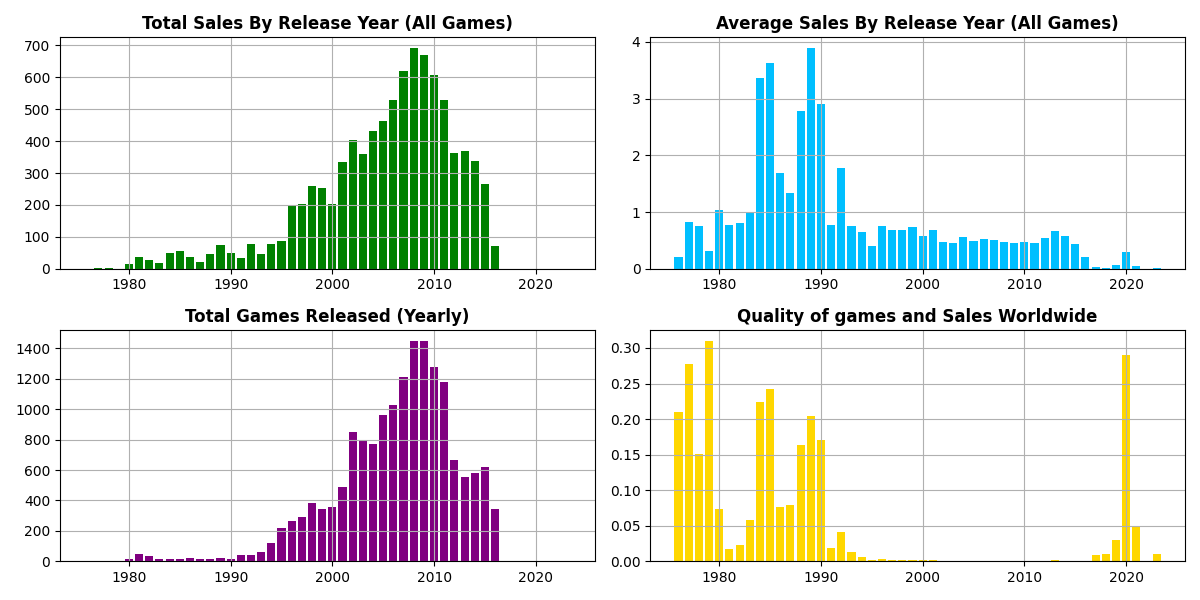

In [25]:
grouped_years = videogames.groupby(videogames['Year'].dt.year)['Global_Sales'].sum()
grouped_years_ = videogames.groupby(videogames['Year'].dt.year)['Global_Sales'].mean()
total_games_released_per_year = videogames.groupby(videogames['Year'].dt.year)['Name'].count()

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.bar(grouped_years.index,grouped_years, color = 'green'),plt.grid()
plt.title('Total Sales By Release Year (All Games)', fontweight = 'bold', fontsize = 12)
plt.subplot(2,2,2)
plt.bar(grouped_years_.index,grouped_years_, color = 'deepskyblue'),plt.grid()
plt.title('Average Sales By Release Year (All Games)', fontweight = 'bold', fontsize = 12)
plt.subplot(2,2,3)
plt.bar(total_games_released_per_year.index,total_games_released_per_year, color = 'purple'),plt.grid()
plt.title('Total Games Released (Yearly)', fontweight = 'bold', fontsize = 12)
plt.subplot(2,2,4)
# Quality of games is understood as the quantity sold in millions, divided by the amount of games released that year.
# Higher number means each game released that year sold more copies
plt.bar(total_games_released_per_year.index,grouped_years_ / total_games_released_per_year, color = 'gold'),plt.grid()
plt.title('Quality of games and Sales Worldwide', fontweight = 'bold', fontsize = 12)
plt.tight_layout()
plt.show()

In [26]:
best_games_all_times = videogames.groupby(videogames['Rank'])['Name'].value_counts()
best_games_all_times

Rank   Name                                            
1      Wii Sports                                          1
2      Super Mario Bros.                                   1
3      Mario Kart Wii                                      1
4      Wii Sports Resort                                   1
5      Pokemon Red/Pokemon Blue                            1
                                                          ..
16596  Woody Woodpecker in Crazy Castle 5                  1
16597  Men in Black II: Alien Escape                       1
16598  SCORE International Baja 1000: The Official Game    1
16599  Know How 2                                          1
16600  Spirits & Spells                                    1
Name: count, Length: 16598, dtype: int64

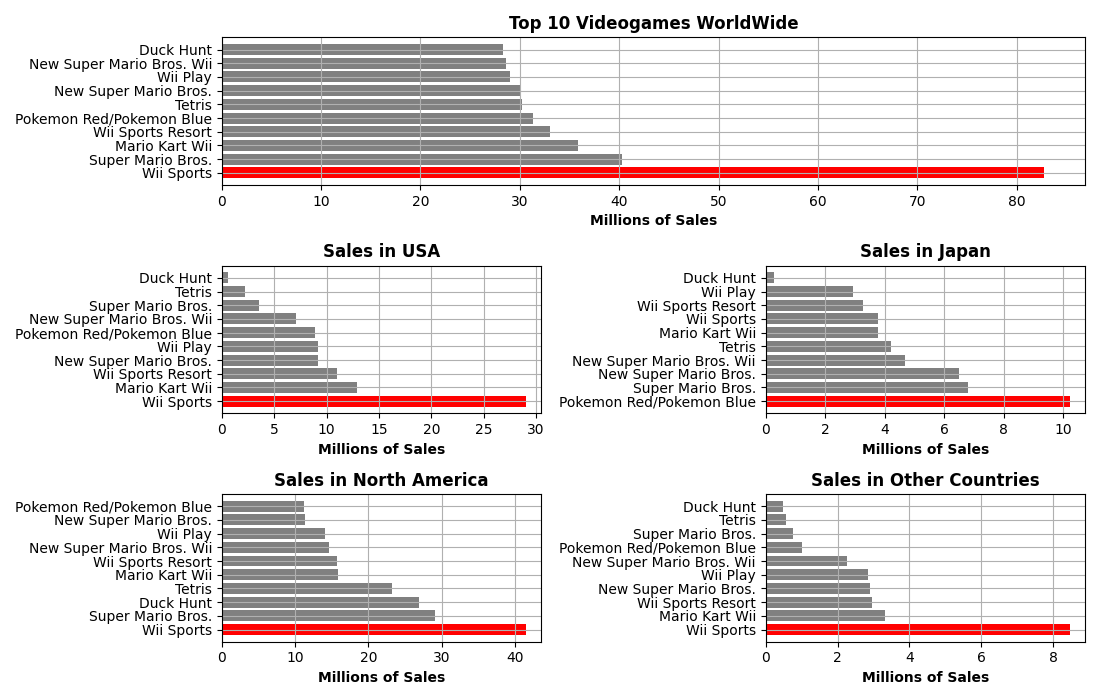

In [27]:
top_10_videogames = videogames[ (videogames['Rank']<11) & (videogames['Year'] <= '2024-01-01' ) ].sort_values(by = 'Rank', ascending=False)
top_10_videogames = top_10_videogames.sort_values(by = 'Global_Sales', ascending=False)
sales_usa = top_10_videogames.sort_values(by = 'EU_Sales', ascending=False)
sales_na = top_10_videogames.sort_values(by = 'NA_Sales', ascending=False)
sales_jp = top_10_videogames.sort_values(by = 'JP_Sales', ascending=False)
other_sales = top_10_videogames.sort_values(by = 'Other_Sales', ascending=False)

colors = ['red']  + ['gray'] * (len(top_10_videogames) - 1)
plt.figure(figsize=(11,7))
plt.subplot(3,2,(1,2)), plt.barh(top_10_videogames.Name, top_10_videogames.Global_Sales, color = colors), plt.xlabel('Millions of Sales', fontweight = 'bold'), plt.title('Top 10 Videogames WorldWide', fontweight = 'bold', fontsize = 12), plt.grid()
plt.subplot(3,2,3), plt.barh(sales_usa.Name, sales_usa.EU_Sales, color = colors), plt.xlabel('Millions of Sales', fontweight = 'bold'), plt.title('Sales in USA', fontweight = 'bold', fontsize = 12), plt.grid()
plt.subplot(3,2,5), plt.barh(sales_na.Name, sales_na.NA_Sales, color = colors), plt.xlabel('Millions of Sales', fontweight = 'bold'), plt.title('Sales in North America', fontweight = 'bold', fontsize = 12), plt.grid()
plt.subplot(3,2,4), plt.barh(sales_jp.Name, sales_jp.JP_Sales, color = colors), plt.xlabel('Millions of Sales', fontweight = 'bold'), plt.title('Sales in Japan', fontweight = 'bold', fontsize = 12), plt.grid()
plt.subplot(3,2,6), plt.barh(other_sales.Name, other_sales.Other_Sales, color = colors), plt.xlabel('Millions of Sales', fontweight = 'bold'), plt.title('Sales in Other Countries', fontweight = 'bold', fontsize = 12), plt.grid()

plt.tight_layout()
plt.show()


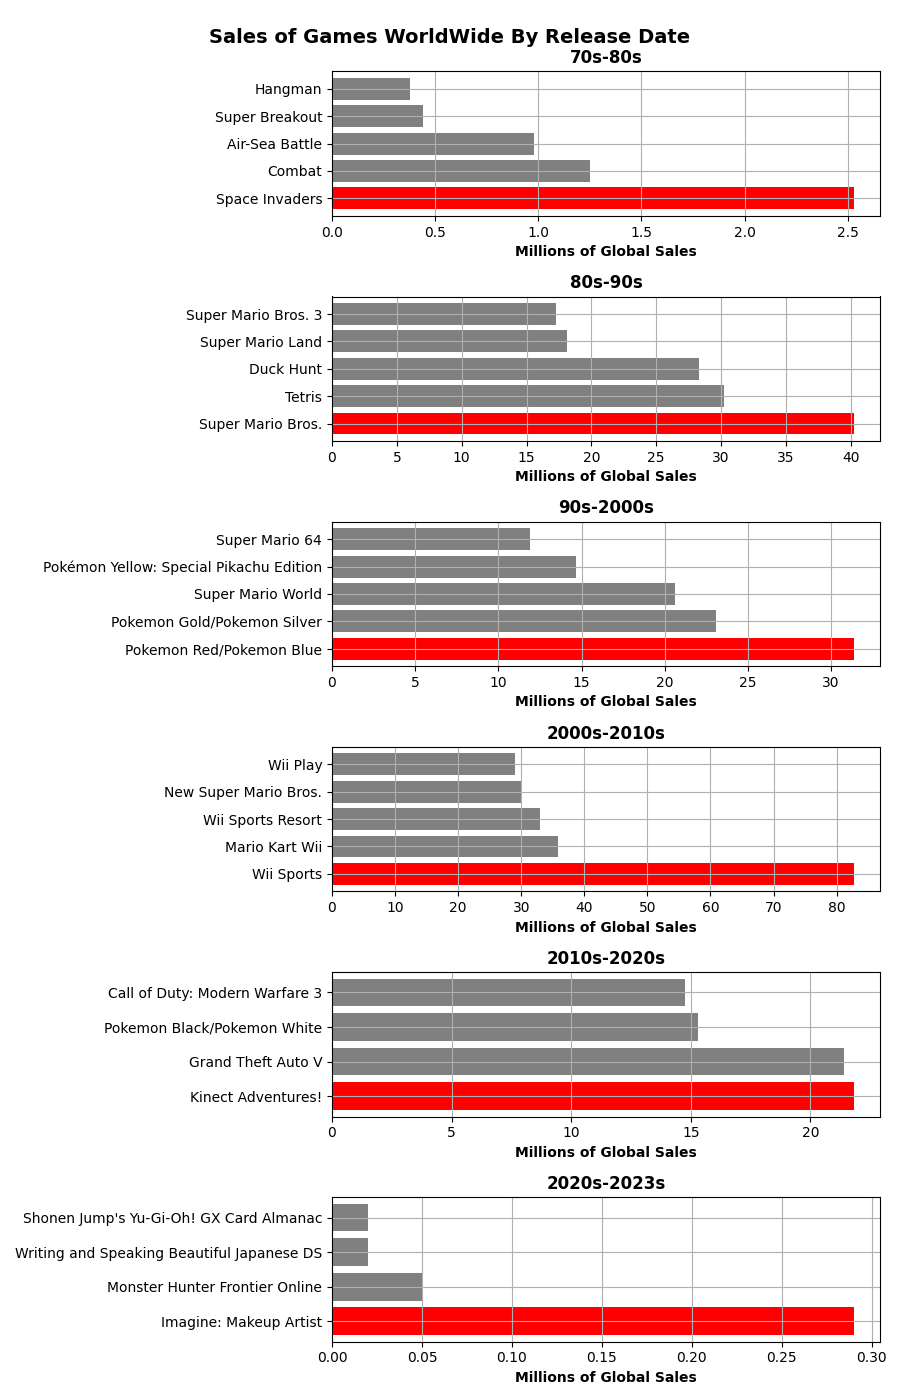

In [28]:
# Show games with most sales in years released (by decade or lustrum)
top_videogames_70s_80s = videogames[ ('1970-01-01' <= videogames['Year']) & (videogames['Year']< '1980-01-01' ) ].sort_values(by = 'Global_Sales', ascending=False)[:5]
colors = ['red']  + ['gray'] * (len(top_videogames_70s_80s) - 1)
top_videogames_80s_90s =  videogames[ ('1980-01-01' <= videogames['Year']) & (videogames['Year']< '1990-01-01' ) ].sort_values(by = 'Global_Sales', ascending=False)[:5]
top_videogames_90s_2000s = videogames[ ('1990-01-01' <= videogames['Year']) & (videogames['Year']< '2000-01-01' ) ].sort_values(by = 'Global_Sales', ascending=False)[:5]
top_videogames_2000s_2010s = videogames[ ('2000-01-01' <= videogames['Year']) & (videogames['Year']< '2010-01-01' ) ].sort_values(by = 'Global_Sales', ascending=False)[:5]
top_videogames_2010s_2020s =  videogames[ ('2010-01-01' <= videogames['Year']) & (videogames['Year']< '2020-01-01' ) ].sort_values(by = 'Global_Sales', ascending=False)[:5]
top_videogames_2020s_now = videogames[ ('2020-01-01' <= videogames['Year']) & (videogames['Year']< '2025-01-01' ) ].sort_values(by = 'Global_Sales', ascending=False)[:5]

plt.figure(figsize=(9,14))
plt.suptitle('Sales of Games WorldWide By Release Date', fontweight = 'bold', fontsize = 14 )
plt.subplot(6,1,1), plt.barh(top_videogames_70s_80s.Name, top_videogames_70s_80s.Global_Sales, color = colors), plt.xlabel('Millions of Global Sales', fontweight = 'bold'), plt.title('70s-80s', fontweight = 'bold', fontsize = 12), plt.grid()
plt.subplot(6,1,2), plt.barh(top_videogames_80s_90s.Name, top_videogames_80s_90s.Global_Sales, color = colors), plt.xlabel('Millions of Global Sales', fontweight = 'bold'), plt.title('80s-90s', fontweight = 'bold', fontsize = 12), plt.grid()
plt.subplot(6,1,3), plt.barh(top_videogames_90s_2000s.Name, top_videogames_90s_2000s.Global_Sales,color = colors), plt.xlabel('Millions of Global Sales', fontweight = 'bold'), plt.title('90s-2000s', fontweight = 'bold', fontsize = 12), plt.grid()
plt.subplot(6,1,4), plt.barh(top_videogames_2000s_2010s.Name, top_videogames_2000s_2010s.Global_Sales, color = colors), plt.xlabel('Millions of Global Sales', fontweight = 'bold'), plt.title('2000s-2010s', fontweight = 'bold', fontsize = 12), plt.grid()
plt.subplot(6,1,5), plt.barh(top_videogames_2010s_2020s.Name, top_videogames_2010s_2020s.Global_Sales, color = colors), plt.xlabel('Millions of Global Sales', fontweight = 'bold'), plt.title('2010s-2020s', fontweight = 'bold', fontsize = 12), plt.grid()
plt.subplot(6,1,6), plt.barh(top_videogames_2020s_now.Name, top_videogames_2020s_now.Global_Sales, color = colors), plt.xlabel('Millions of Global Sales', fontweight = 'bold'), plt.title('2020s-2023s', fontweight = 'bold', fontsize = 12), plt.grid()

plt.tight_layout()
plt.show()


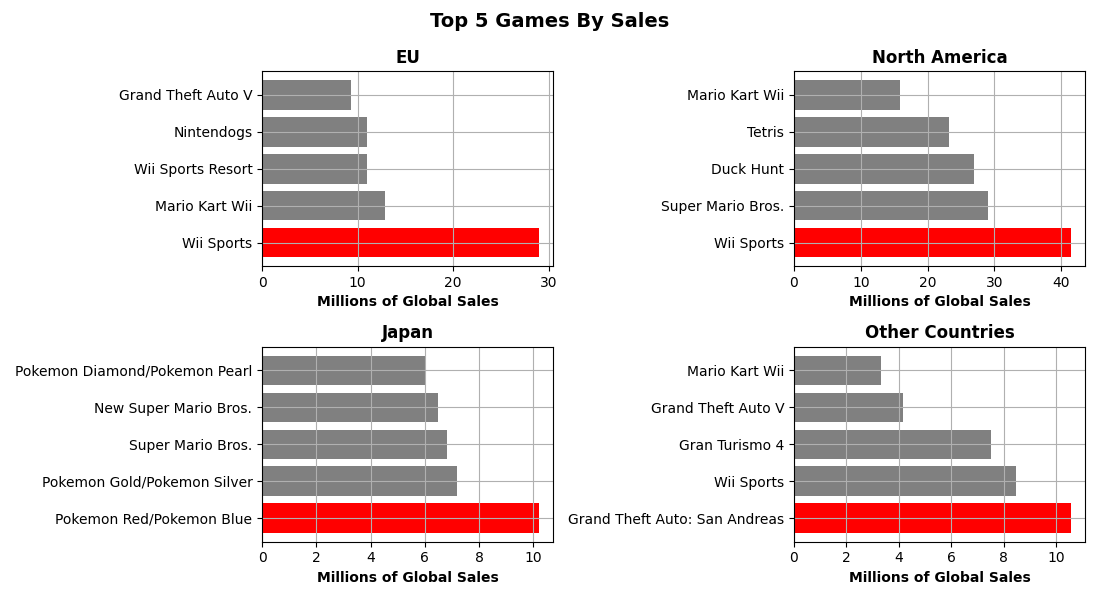

In [29]:
# Top 5 games by country sales
top_5_videogames_usa = videogames.sort_values(by = 'EU_Sales', ascending=False)[:5]
top_5_videogames_na = videogames.sort_values(by = 'NA_Sales', ascending=False)[:5]
top_5_videogames_jp = videogames.sort_values(by = 'JP_Sales', ascending=False)[:5]
top_5_videogames_OTHER = videogames.sort_values(by = 'Other_Sales', ascending=False)[:5]

colors = ['red']  + ['gray'] * (len(top_5_videogames_usa) - 1)

plt.figure(figsize=(11,6))
plt.suptitle('Top 5 Games By Sales', fontweight = 'bold', fontsize = 14 )
plt.subplot(2,2,1), plt.barh(top_5_videogames_usa.Name, top_5_videogames_usa.EU_Sales, color = colors), plt.xlabel('Millions of Global Sales', fontweight = 'bold'), plt.title('EU', fontweight = 'bold', fontsize = 12), plt.grid()
plt.subplot(2,2,2), plt.barh(top_5_videogames_na.Name, top_5_videogames_na.NA_Sales, color = colors), plt.xlabel('Millions of Global Sales', fontweight = 'bold'), plt.title('North America', fontweight = 'bold', fontsize = 12), plt.grid()
plt.subplot(2,2,3), plt.barh(top_5_videogames_jp.Name, top_5_videogames_jp.JP_Sales, color = colors), plt.xlabel('Millions of Global Sales', fontweight = 'bold'), plt.title('Japan', fontweight = 'bold', fontsize = 12), plt.grid()
plt.subplot(2,2,4), plt.barh(top_5_videogames_OTHER.Name, top_5_videogames_OTHER.Other_Sales, color = colors), plt.xlabel('Millions of Global Sales', fontweight = 'bold'), plt.title('Other Countries', fontweight = 'bold', fontsize = 12), plt.grid()

plt.tight_layout()
plt.show()

In [30]:
# Show popular genres global and regionally
colors = ['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] 

fig = px.treemap(videogames, path=['Genre'],values='Global_Sales', width=800, height=400, title = '<b>Global Most Popular Genres<b>')
fig.update_layout(
    treemapcolorway = colors, 
    margin = dict(t=40, l=0, r=0, b=10)
)
fig.update_traces(marker=dict(cornerradius=10))
fig.show()

In [32]:
colors = ['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] 

fig = px.treemap(videogames, path=['Genre'],values='EU_Sales', width=800, height=400, title = '<b>EU Most Popular Genres<b>')
fig.update_layout(
    treemapcolorway = colors, 
    margin = dict(t=40, l=0, r=0, b=10)
)
fig.update_traces(marker=dict(cornerradius=10))
fig.show()

In [33]:
colors = ['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] 

fig = px.treemap(videogames, path=['Genre'],values='JP_Sales', width=800, height=400, title = '<b>Japan Most Popular Genres<b>')
fig.update_layout(
    treemapcolorway = colors, 
    margin = dict(t=40, l=0, r=0, b=10)
)
fig.update_traces(marker=dict(cornerradius=10))
fig.show()

In [34]:
colors = ['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] 

fig = px.treemap(videogames, path=['Genre'],values='NA_Sales', width=800, height=400, title = '<b>North America Most Popular Genres<b>')
fig.update_layout(
    treemapcolorway = colors, 
    margin = dict(t=40, l=0, r=0, b=10)
)
fig.update_traces(marker=dict(cornerradius=10))
fig.show()

In [35]:
# Show best game per publisher
best_games = videogames.sort_values(by = 'Global_Sales', ascending=False)
best_game_per_publisher = best_games.groupby('Publisher').agg({
    'Name': 'first',
    'Rank': 'first',
    'Global_Sales': 'first'
})

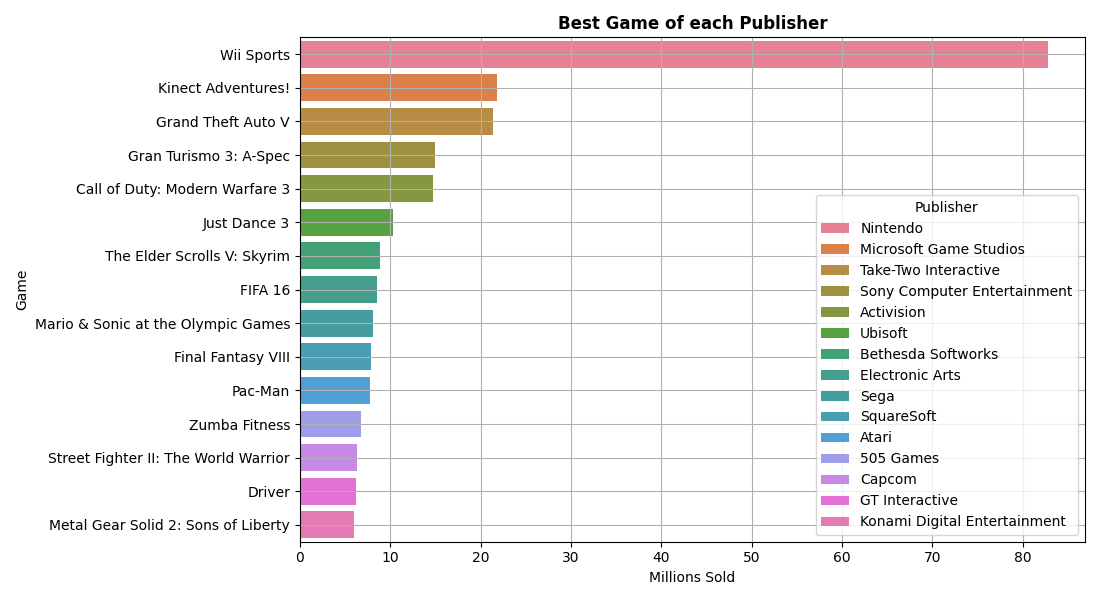

In [36]:
games_per_publisher = best_game_per_publisher.sort_values(by = 'Global_Sales', ascending = False)[:15]

plt.figure(figsize=(11,6))
sns.barplot(x=games_per_publisher["Global_Sales"], y=games_per_publisher["Name"], hue=games_per_publisher.index, dodge=False)

plt.xlabel("Millions Sold")
plt.ylabel("Game")
plt.title("Best Game of each Publisher", fontweight = 'bold', fontsize = 12)
plt.legend(title="Publisher")
plt.grid()
plt.tight_layout()
plt.show()

In [37]:
best_game_per_platform = best_games.groupby('Platform').agg({
    'Name': 'first',
    'Rank': 'first',
    'Global_Sales': 'first'
})

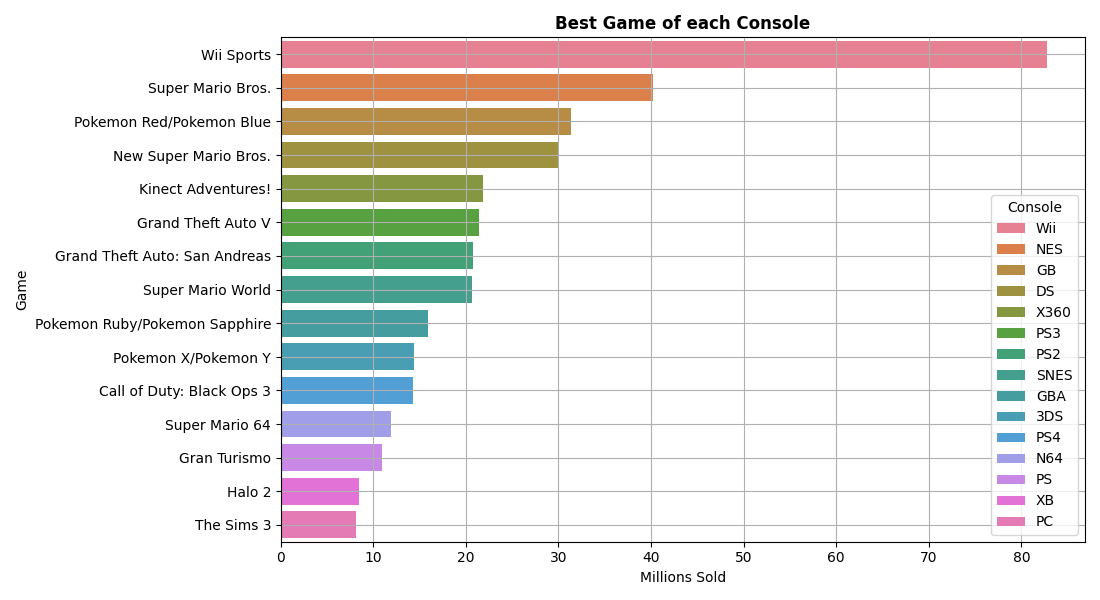

In [38]:
games_per_console = best_game_per_platform.sort_values(by = 'Global_Sales', ascending = False)[:15]

plt.figure(figsize=(11,6))
sns.barplot(x=games_per_console["Global_Sales"], y=games_per_console["Name"], hue=games_per_console.index, dodge=False)

plt.xlabel("Millions Sold")
plt.ylabel("Game")
plt.title("Best Game of each Console", fontweight = 'bold', fontsize = 12)
plt.legend(title="Console")
plt.grid()
plt.tight_layout()
plt.show()

In [39]:
# Accumulated sales of all times (Publisher)
sales_per_publisher = best_games.groupby('Publisher').agg({
    'Rank': 'mean',
    'Global_Sales': 'sum'
})

cum_sales_publisher = sales_per_publisher.sort_values(by = 'Global_Sales', ascending = False)[:15]

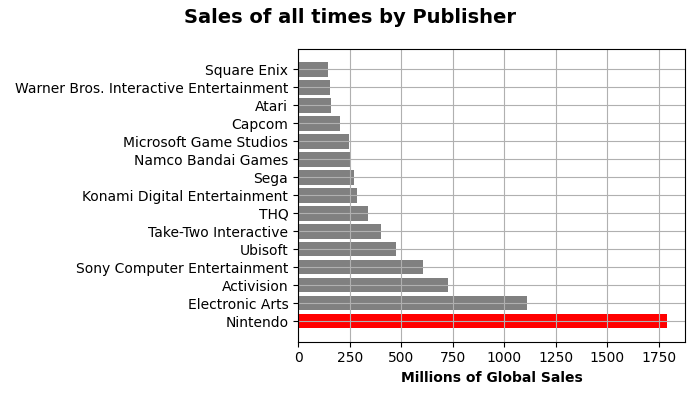

In [40]:
colors = ['red']  + ['gray'] * (len(cum_sales_publisher) - 1)

plt.figure(figsize=(7,4))
plt.suptitle('Sales of all times by Publisher', fontweight = 'bold', fontsize = 14 )
plt.barh(cum_sales_publisher.index, cum_sales_publisher.Global_Sales, color = colors), plt.xlabel('Millions of Global Sales', fontweight = 'bold'),  plt.grid()

plt.tight_layout()
plt.show()

In [41]:
# Accumulated sales of all times (Console)
sales_per_platform = best_games.groupby('Platform').agg({
    'Rank': 'mean',
    'Global_Sales': 'sum'
})

cum_sales_platform = sales_per_platform.sort_values(by = 'Global_Sales', ascending = False)[:15]

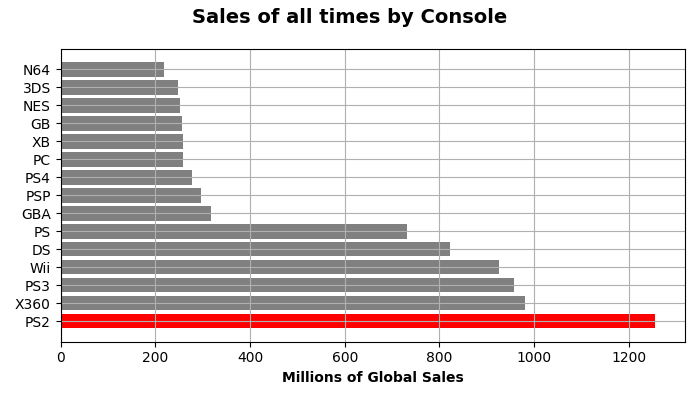

In [42]:
colors = ['red']  + ['gray'] * (len(cum_sales_platform) - 1)

plt.figure(figsize=(7,4))
plt.suptitle('Sales of all times by Console', fontweight = 'bold', fontsize = 14 )
plt.barh(cum_sales_platform.index, cum_sales_platform.Global_Sales, color = colors), plt.xlabel('Millions of Global Sales', fontweight = 'bold'),  plt.grid()

plt.tight_layout()
plt.show()

In [43]:
best_game_by_year = videogames.loc[videogames.groupby("Year")["Global_Sales"].idxmax()]
best_game_by_year
# As seen, the dataset is incomplete because it doesn't have the sales of the best games recently, so the results should be taken with caution

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16442,7372,Breakaway IV,2600,1976-01-01,Puzzle,Sears,0.20,0.01,0.00,0.00,0.21
16343,1587,Combat,2600,1977-01-01,Action,Atari,1.17,0.07,0.00,0.01,1.25
16331,608,Space Invaders,2600,1978-01-01,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
16410,5800,Slot Machine,2600,1979-01-01,Action,Atari,0.29,0.02,0.00,0.00,0.31
0,259,Asteroids,2600,1980-01-01,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
9,240,Pitfall!,2600,1981-01-01,Platform,Activision,4.21,0.24,0.00,0.05,4.50
55,90,Pac-Man,2600,1982-01-01,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
91,422,Baseball,NES,1983-01-01,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
108,10,Duck Hunt,NES,1984-01-01,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
122,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
